<a href="https://colab.research.google.com/github/tuomaseerola/music_and_science_seminar/blob/master/seminar2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music and Science – Sound Creation Tutorial

[Tuomas Eerola](https://www.durham.ac.uk/staff/tuomas-eerola/), Durham University, Music Department, 2022.

For **Music and Science** Module, Seminar 2

_Last update 30/10/2022 by TE_

In [6]:
import numpy as np
import IPython.display as ipd
from matplotlib import pyplot as plt 
%matplotlib inline

## 1. Create sine waves

### 1.1. Define the properties of a sine wave

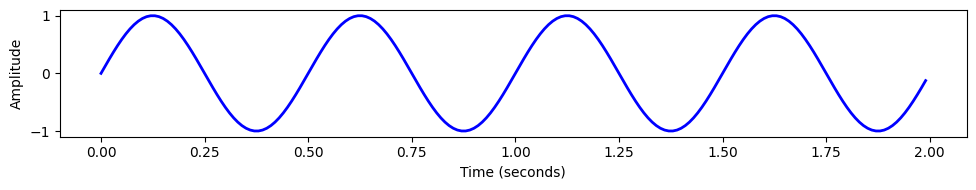

In [7]:
frequency = 2   # Frequency   #PROMPT: Change the values of the frequency, duration, amplitude, phase, and sampling rate to see how the output changes.
duration = 2    # Duration of sound
amplitude = 1.0 # Amplitude
phase = 0.0     # Phase
Fs = 100        # Sampling rate (per second)

# This code creates the sine wave with the properties you detailed above
num_samples = int(Fs * duration) 
t = np.arange(num_samples) / Fs
x = amplitude * np.sin(2 * np.pi * (frequency * t - phase))

# This code plots the result
plt.figure(figsize=(10, 2))
plt.plot(t, x, color = 'blue', linewidth = 2.0, linestyle = '-')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()

### 1.2 Create a sine wave that you can listen to 

**TASK** - Try varying the parameters (frequency, phase, amplitude). Can you hear the effect of changing phase?


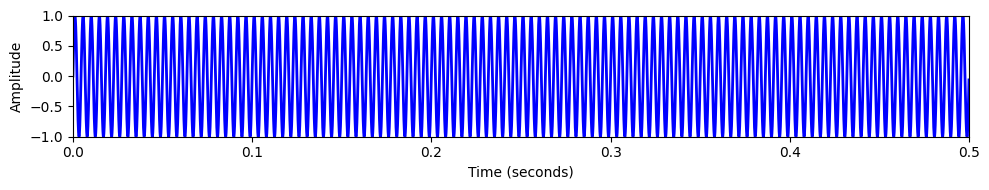

In [15]:
frequency = 220  #PROMPT: Change the values of the frequency and phase and run the code. Notice the differences in the audio file and plot.
duration = 0.50
amplitude = 1.0
phase = 0.0
Fs = 22050

num_samples = int(Fs * duration)
t = np.arange(num_samples) / Fs
x = amplitude * np.sin(2 * np.pi * (frequency * t - phase))

plt.figure(figsize=(10, 2))
plt.plot(t, x, color='blue', linewidth=2.0, linestyle='-')
plt.xlim([0, duration])
plt.ylim([-1, 1])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
ipd.display(ipd.Audio(data=x, rate=Fs))

### 1.3 Combine several sine waves to create a complex sound
**TASK** - try altering the frequencies:
  * Try to create a sound that has a missing fundamental frequency of 200Hz (lecture example had only partials 800, 1000, and 1200 hz).

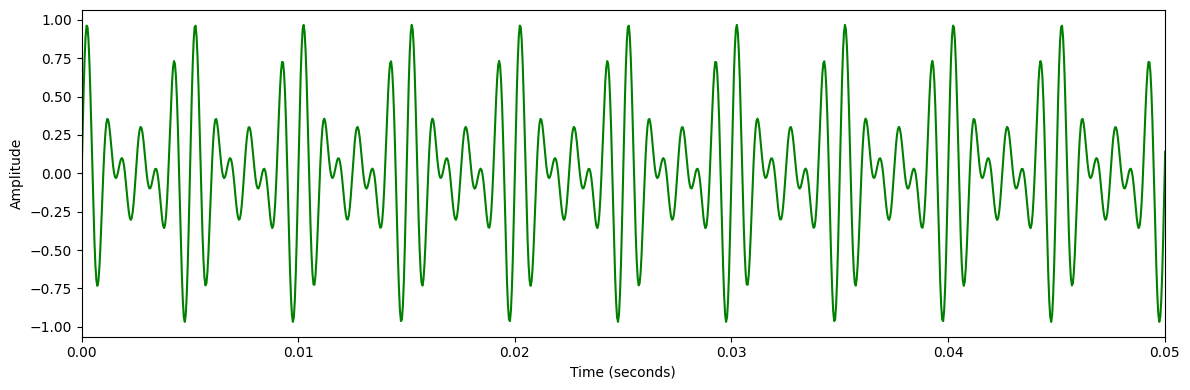

In [17]:
# Combine several sine waves (here are three frequencies)
frequency1 = 800 #PROMPT: Change the values of the 3 frequencies and listen to the output. Carry out the tasks above.
frequency2 = 1000
frequency3 = 1200
duration = 1.0
amplitude = 1.0
phase = 0.0
Fs = 22050

num_samples = int(Fs * duration)
t = np.arange(num_samples) / Fs
x1 = amplitude * np.sin(2 * np.pi * (frequency1 * t - phase)) # 1st sine
x2 = amplitude * np.sin(2 * np.pi * (frequency2 * t - phase)) # 2nd sine
x3 = amplitude * np.sin(2 * np.pi * (frequency3 * t - phase)) # 3rd sine
# Combine all three (sum and divide by 3 to keep the amplitude as original)
x123=(x1+x2+x3)/3

plt.figure(figsize=(12, 4))
plt.plot(t, x123, color = 'green')
plt.xlim([0, 0.05])             # New element: Just show the first 50 ms
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
ipd.display(ipd.Audio(data=x123, rate=Fs))

## Create beating sound
In the lectures we heard some beating (mistuned) sinewave sounds.

**TASK** - Try come up with the worst possible combination using two frequencies that close to each other. Change the frequency in line 2 or both frequencies to find really annoying octave where beating occurs....


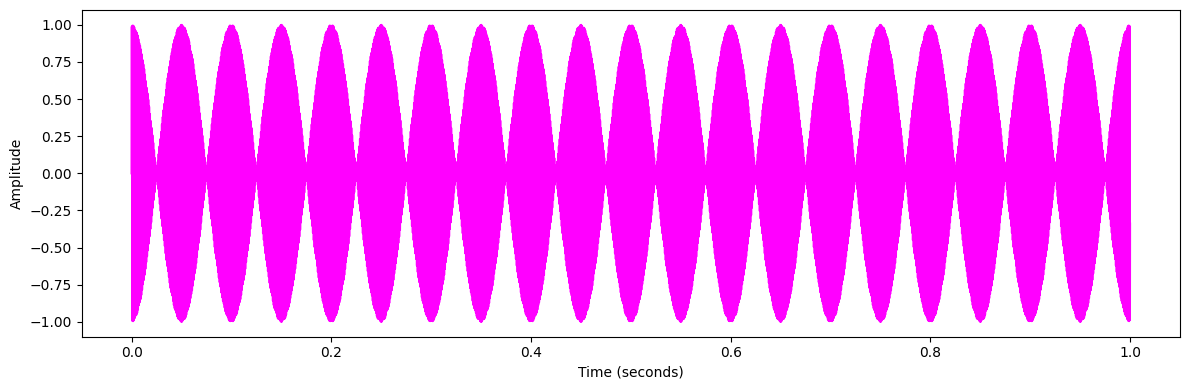

In [28]:
frequency1 = 400
frequency2 = 400

duration = 1.0
amplitude = 1.0
phase = 0.0
Fs = 22050

num_samples = int(Fs * duration)
t = np.arange(num_samples) / Fs
x1 = amplitude * np.sin(2 * np.pi * (frequency1 * t - phase)) # 1st sine
x2 = amplitude * np.sin(2 * np.pi * (frequency2 * t - phase)) # 2nd sine
# Combine both (sum and divide by 2 to keep the amplitude as original)
x12=(x1+x2)/2

plt.figure(figsize=(12, 4))
plt.plot(t, x12, color = 'magenta')
#plt.xlim([0, 0.05])             # New element: Just show the first 50 ms
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
ipd.display(ipd.Audio(data=x12, rate=Fs))

## Save any created sound
If you ever need to save an audio file that you create, you can use this command to save it.

In [29]:
import soundfile as sf
sf.write('beating.wav', x12, Fs)